# Lasso regression with block updating

Sometimes, it is very useful to update a set of parameters together. For example, variables that are highly correlated are often good to update together. In PyMC 3 block updating is simple, as example will demonstrate.

Here we have a LASSO regression model where the two coefficients are strongly correlated. Normally, we would define the coefficient parameters as a single random variable, but here we define them separately to show how to do block updates.

First we generate some fake data.

In [1]:
%matplotlib inline
from matplotlib.pylab import *
from pymc3 import * 
import numpy as np 

d = np.random.normal(size=(3, 30))
d1 = d[0] + 4
d2 = d[1] + 4
yd = .2*d1 +.3*d2 + d[2]

Then define the random variables.

In [2]:
lam = 3

with Model() as model:
    s = Exponential('s', 1)
    tau = Uniform('tau', 0, 1000)
    b = lam * tau
    m1 = Laplace('m1', 0, b)
    m2 = Laplace('m2', 0, b)
    
    p = d1*m1 + d2*m2
    
    y = Normal('y', mu=p, sigma=s, observed=yd) 

For most samplers, including Metropolis and HamiltonianMC, simply pass a list of variables to sample as a block. This works with both scalar and array parameters. 

In [3]:
with model: 
    start = find_MAP()
    
    step1 = Metropolis([m1, m2])
    
    step2 = Slice([s, tau])
    
    trace = sample(10000, [step1, step2], start=start)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [m2]
>>Metropolis: [m1]
>CompoundStep
>>Slice: [tau]
>>Slice: [s]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 53 seconds.
The number of effective samples is smaller than 10% for some parameters.


/dependencies/arviz/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


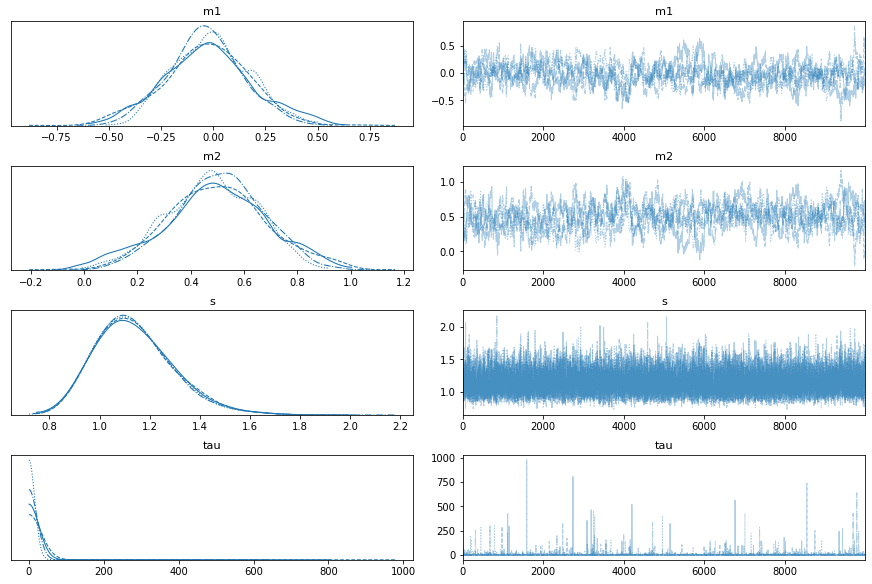

In [4]:
traceplot(trace);

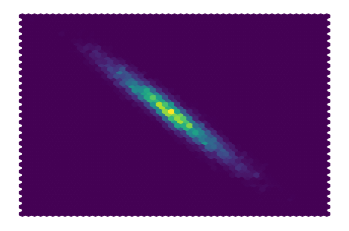

In [5]:
hexbin(trace[m1],trace[m2], gridsize = 50)
axis('off');

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w

platform   1.0.8
matplotlib 3.2.1
re         2.2.1
numpy      1.18.5
logging    0.5.1.2
last updated: Fri Jun 12 2020 

CPython 3.7.7
IPython 7.15.0
watermark 2.0.2
